In [1]:
import torch
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from PIL import Image
from PIL.ImageDraw import Draw
import random
import numpy as np

In [2]:
from utils import *
from model import RPN
from train import train, load_checkpoint
from inference import inference

Variables

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

datatset_path = '../datasets/dataset_v5'

batch_size = 256
num_epochs = 60
lr = 1e-4

conf_threshold=0.90
nms_threshold=0.30

Data Loaders

In [4]:
# Set a random seed for reproducibility
seed = 42
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)

# Load the dataset
dataset = RPNDataset(datatset_path, transform=transform, resize=ResizeWithPad(224))

total_size = len(dataset)
train_size = int(0.90 * total_size)
#val_size = int(0.10 * total_size)
#test_size = total_size - train_size - val_size
val_size = total_size - train_size

# Randomly split the dataset
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_dataset.transform = transform_noise

# Create the DataLoader for the training set
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, collate_fn=collate_fn)

# Create the DataLoader for the validation set
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, collate_fn=collate_fn)

In [5]:
model = RPN(dropout_rate=0.4, device=device).to(device)

In [6]:
model, train_loss_history, val_loss_history, precision_recall_history = train(model, train_loader, val_loader, num_epochs, lr, conf_threshold, nms_threshold, device, checkpoint_dir='models/checkpoints_v5')

Training:   0%|          | 0/106 [00:00<?, ?it/s]/home/vedo/miniconda3/envs/captcha/lib/python3.12/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Training: 100%|██████████| 106/106 [35:30<00:00, 20.10s/it]


Epoch [1/60], Train Loss: 559.9492


Validation: 100%|██████████| 12/12 [02:01<00:00, 10.14s/it]


Epoch [1/60], Val Loss: 391.0572, mAP: 0.0000, Precision: 1.0000, Recall: 0.0000, F1-score: 0.0000
Checkpoint saved at models/checkpoints_v5/model_epoch_1.pth


Training: 100%|██████████| 106/106 [34:22<00:00, 19.46s/it]


Epoch [2/60], Train Loss: 465.7346


Validation: 100%|██████████| 12/12 [01:57<00:00,  9.76s/it]


Epoch [2/60], Val Loss: 343.8672, mAP: 0.0000, Precision: 1.0000, Recall: 0.0000, F1-score: 0.0000
Checkpoint saved at models/checkpoints_v5/model_epoch_2.pth


Training: 100%|██████████| 106/106 [34:16<00:00, 19.40s/it]


Epoch [3/60], Train Loss: 424.0575


Validation: 100%|██████████| 12/12 [01:58<00:00,  9.91s/it]


Epoch [3/60], Val Loss: 325.0533, mAP: 0.2335, Precision: 0.8563, Recall: 0.1713, F1-score: 0.2854
Checkpoint saved at models/checkpoints_v5/model_epoch_3.pth


Training: 100%|██████████| 106/106 [34:18<00:00, 19.42s/it]


Epoch [4/60], Train Loss: 405.5411


Validation: 100%|██████████| 12/12 [01:58<00:00,  9.85s/it]


Epoch [4/60], Val Loss: 318.5487, mAP: 0.2493, Precision: 0.9140, Recall: 0.1828, F1-score: 0.3047
Checkpoint saved at models/checkpoints_v5/model_epoch_4.pth


Training: 100%|██████████| 106/106 [34:30<00:00, 19.54s/it]


Epoch [5/60], Train Loss: 388.6912


Validation: 100%|██████████| 12/12 [01:59<00:00,  9.99s/it]


Epoch [5/60], Val Loss: 301.9115, mAP: 0.3978, Precision: 0.9421, Recall: 0.3402, F1-score: 0.4903
Checkpoint saved at models/checkpoints_v5/model_epoch_5.pth


Training: 100%|██████████| 106/106 [34:29<00:00, 19.53s/it]


Epoch [6/60], Train Loss: 360.9197


Validation: 100%|██████████| 12/12 [01:59<00:00,  9.96s/it]


Epoch [6/60], Val Loss: 255.5929, mAP: 0.8464, Precision: 0.8943, Recall: 0.8465, F1-score: 0.8676
Checkpoint saved at models/checkpoints_v5/model_epoch_6.pth


Training: 100%|██████████| 106/106 [34:18<00:00, 19.42s/it]


Epoch [7/60], Train Loss: 315.5405


Validation: 100%|██████████| 12/12 [02:00<00:00, 10.01s/it]


Epoch [7/60], Val Loss: 196.7473, mAP: 0.9004, Precision: 0.9293, Recall: 0.8973, F1-score: 0.9115
Checkpoint saved at models/checkpoints_v5/model_epoch_7.pth


Training: 100%|██████████| 106/106 [34:15<00:00, 19.39s/it]


Epoch [8/60], Train Loss: 267.5796


Validation: 100%|██████████| 12/12 [01:59<00:00,  9.94s/it]


Epoch [8/60], Val Loss: 146.2505, mAP: 0.9545, Precision: 0.9604, Recall: 0.9558, F1-score: 0.9578
Checkpoint saved at models/checkpoints_v5/model_epoch_8.pth


Training: 100%|██████████| 106/106 [34:23<00:00, 19.46s/it]


Epoch [9/60], Train Loss: 232.9564


Validation: 100%|██████████| 12/12 [01:59<00:00,  9.92s/it]


Epoch [9/60], Val Loss: 120.1719, mAP: 0.9779, Precision: 0.9799, Recall: 0.9787, F1-score: 0.9792
Checkpoint saved at models/checkpoints_v5/model_epoch_9.pth


Training: 100%|██████████| 106/106 [34:26<00:00, 19.49s/it]


Epoch [10/60], Train Loss: 215.5265


Validation: 100%|██████████| 12/12 [02:00<00:00, 10.00s/it]


Epoch [10/60], Val Loss: 109.6120, mAP: 0.9850, Precision: 0.9869, Recall: 0.9856, F1-score: 0.9862
Checkpoint saved at models/checkpoints_v5/model_epoch_10.pth


Training: 100%|██████████| 106/106 [34:16<00:00, 19.40s/it]


Epoch [11/60], Train Loss: 203.5534


Validation: 100%|██████████| 12/12 [01:58<00:00,  9.92s/it]


Epoch [11/60], Val Loss: 99.5907, mAP: 0.9873, Precision: 0.9893, Recall: 0.9878, F1-score: 0.9885
Checkpoint saved at models/checkpoints_v5/model_epoch_11.pth


Training: 100%|██████████| 106/106 [34:28<00:00, 19.51s/it]


Epoch [12/60], Train Loss: 195.7236


Validation: 100%|██████████| 12/12 [01:59<00:00,  9.94s/it]


Epoch [12/60], Val Loss: 100.4028, mAP: 0.9902, Precision: 0.9915, Recall: 0.9905, F1-score: 0.9910
Checkpoint saved at models/checkpoints_v5/model_epoch_12.pth


Training: 100%|██████████| 106/106 [34:26<00:00, 19.50s/it]


Epoch [13/60], Train Loss: 190.7549


Validation: 100%|██████████| 12/12 [01:59<00:00,  9.99s/it]


Epoch [13/60], Val Loss: 96.3077, mAP: 0.9907, Precision: 0.9920, Recall: 0.9916, F1-score: 0.9918
Checkpoint saved at models/checkpoints_v5/model_epoch_13.pth


Training: 100%|██████████| 106/106 [34:18<00:00, 19.42s/it]


Epoch [14/60], Train Loss: 186.7556


Validation: 100%|██████████| 12/12 [01:59<00:00,  9.95s/it]


Epoch [14/60], Val Loss: 94.1047, mAP: 0.9927, Precision: 0.9933, Recall: 0.9928, F1-score: 0.9930
Checkpoint saved at models/checkpoints_v5/model_epoch_14.pth


Training: 100%|██████████| 106/106 [34:24<00:00, 19.48s/it]


Epoch [15/60], Train Loss: 180.7147


Validation: 100%|██████████| 12/12 [01:58<00:00,  9.89s/it]


Epoch [15/60], Val Loss: 88.7185, mAP: 0.9929, Precision: 0.9935, Recall: 0.9932, F1-score: 0.9933
Checkpoint saved at models/checkpoints_v5/model_epoch_15.pth


Training: 100%|██████████| 106/106 [34:30<00:00, 19.53s/it]


Epoch [16/60], Train Loss: 176.4812


Validation: 100%|██████████| 12/12 [01:59<00:00,  9.93s/it]


Epoch [16/60], Val Loss: 86.5927, mAP: 0.9939, Precision: 0.9945, Recall: 0.9943, F1-score: 0.9943
Checkpoint saved at models/checkpoints_v5/model_epoch_16.pth


Training: 100%|██████████| 106/106 [33:16<00:00, 18.83s/it]


Epoch [17/60], Train Loss: 174.1614


Validation: 100%|██████████| 12/12 [01:55<00:00,  9.61s/it]


Epoch [17/60], Val Loss: 82.8275, mAP: 0.9946, Precision: 0.9951, Recall: 0.9948, F1-score: 0.9949
Checkpoint saved at models/checkpoints_v5/model_epoch_17.pth


Training: 100%|██████████| 106/106 [32:18<00:00, 18.29s/it]


Epoch [18/60], Train Loss: 171.0965


Validation: 100%|██████████| 12/12 [01:53<00:00,  9.47s/it]


Epoch [18/60], Val Loss: 85.8598, mAP: 0.9950, Precision: 0.9953, Recall: 0.9952, F1-score: 0.9953
Checkpoint saved at models/checkpoints_v5/model_epoch_18.pth


Training: 100%|██████████| 106/106 [35:54<00:00, 20.33s/it]


Epoch [19/60], Train Loss: 168.8467


Validation: 100%|██████████| 12/12 [01:58<00:00,  9.89s/it]


Epoch [19/60], Val Loss: 88.6448, mAP: 0.9941, Precision: 0.9945, Recall: 0.9943, F1-score: 0.9944
Checkpoint saved at models/checkpoints_v5/model_epoch_19.pth


Training: 100%|██████████| 106/106 [36:19<00:00, 20.56s/it]


Epoch [20/60], Train Loss: 166.2525


Validation: 100%|██████████| 12/12 [02:01<00:00, 10.10s/it]


Epoch [20/60], Val Loss: 85.8584, mAP: 0.9944, Precision: 0.9948, Recall: 0.9946, F1-score: 0.9947
Checkpoint saved at models/checkpoints_v5/model_epoch_20.pth


Training: 100%|██████████| 106/106 [27:23<00:00, 15.50s/it]


Epoch [21/60], Train Loss: 165.8028


Validation: 100%|██████████| 12/12 [01:22<00:00,  6.85s/it]


Epoch [21/60], Val Loss: 85.2296, mAP: 0.9961, Precision: 0.9964, Recall: 0.9962, F1-score: 0.9963
Checkpoint saved at models/checkpoints_v5/model_epoch_21.pth


Training: 100%|██████████| 106/106 [38:11<00:00, 21.62s/it]


Epoch [22/60], Train Loss: 164.1066


Validation: 100%|██████████| 12/12 [02:43<00:00, 13.63s/it]


Epoch [22/60], Val Loss: 82.8661, mAP: 0.9961, Precision: 0.9964, Recall: 0.9961, F1-score: 0.9962
Checkpoint saved at models/checkpoints_v5/model_epoch_22.pth


Training: 100%|██████████| 106/106 [24:24<00:00, 13.81s/it]


Epoch [23/60], Train Loss: 162.5526


Validation: 100%|██████████| 12/12 [01:07<00:00,  5.66s/it]


Epoch [23/60], Val Loss: 84.7834, mAP: 0.9956, Precision: 0.9959, Recall: 0.9956, F1-score: 0.9957
Checkpoint saved at models/checkpoints_v5/model_epoch_23.pth


Training: 100%|██████████| 106/106 [36:45<00:00, 20.80s/it]


Epoch [24/60], Train Loss: 161.7968


Validation: 100%|██████████| 12/12 [02:06<00:00, 10.58s/it]


Epoch [24/60], Val Loss: 83.8263, mAP: 0.9955, Precision: 0.9958, Recall: 0.9955, F1-score: 0.9956
Checkpoint saved at models/checkpoints_v5/model_epoch_24.pth


Training: 100%|██████████| 106/106 [36:30<00:00, 20.66s/it]


Epoch [25/60], Train Loss: 161.0147


Validation: 100%|██████████| 12/12 [02:02<00:00, 10.24s/it]


Epoch [25/60], Val Loss: 85.8634, mAP: 0.9953, Precision: 0.9958, Recall: 0.9954, F1-score: 0.9956
Checkpoint saved at models/checkpoints_v5/model_epoch_25.pth


Training: 100%|██████████| 106/106 [28:47<00:00, 16.30s/it]


Epoch [26/60], Train Loss: 159.3956


Validation: 100%|██████████| 12/12 [01:08<00:00,  5.68s/it]


Epoch [26/60], Val Loss: 86.6806, mAP: 0.9942, Precision: 0.9944, Recall: 0.9942, F1-score: 0.9943
Checkpoint saved at models/checkpoints_v5/model_epoch_26.pth


Training: 100%|██████████| 106/106 [19:20<00:00, 10.95s/it]


Epoch [27/60], Train Loss: 158.1070


Validation: 100%|██████████| 12/12 [01:05<00:00,  5.49s/it]


Epoch [27/60], Val Loss: 83.7382, mAP: 0.9959, Precision: 0.9960, Recall: 0.9959, F1-score: 0.9960
Checkpoint saved at models/checkpoints_v5/model_epoch_27.pth


Training: 100%|██████████| 106/106 [19:19<00:00, 10.94s/it]


Epoch [28/60], Train Loss: 156.7008


Validation: 100%|██████████| 12/12 [01:04<00:00,  5.35s/it]


Epoch [28/60], Val Loss: 83.7946, mAP: 0.9948, Precision: 0.9949, Recall: 0.9948, F1-score: 0.9948
Checkpoint saved at models/checkpoints_v5/model_epoch_28.pth


Training: 100%|██████████| 106/106 [19:22<00:00, 10.97s/it]


Epoch [29/60], Train Loss: 156.1112


Validation: 100%|██████████| 12/12 [01:09<00:00,  5.78s/it]


Epoch [29/60], Val Loss: 80.6833, mAP: 0.9956, Precision: 0.9958, Recall: 0.9955, F1-score: 0.9956
Checkpoint saved at models/checkpoints_v5/model_epoch_29.pth


Training: 100%|██████████| 106/106 [18:48<00:00, 10.65s/it]


Epoch [30/60], Train Loss: 155.2627


Validation: 100%|██████████| 12/12 [01:07<00:00,  5.66s/it]


Epoch [30/60], Val Loss: 81.5607, mAP: 0.9955, Precision: 0.9956, Recall: 0.9955, F1-score: 0.9955
Checkpoint saved at models/checkpoints_v5/model_epoch_30.pth


Training: 100%|██████████| 106/106 [18:40<00:00, 10.57s/it]


Epoch [31/60], Train Loss: 154.1574


Validation: 100%|██████████| 12/12 [01:09<00:00,  5.83s/it]


Epoch [31/60], Val Loss: 82.4585, mAP: 0.9958, Precision: 0.9958, Recall: 0.9957, F1-score: 0.9957
Checkpoint saved at models/checkpoints_v5/model_epoch_31.pth


Training: 100%|██████████| 106/106 [18:16<00:00, 10.34s/it]


Epoch [32/60], Train Loss: 153.1743


Validation: 100%|██████████| 12/12 [02:05<00:00, 10.47s/it]


Epoch [32/60], Val Loss: 80.2271, mAP: 0.9950, Precision: 0.9951, Recall: 0.9949, F1-score: 0.9950
Checkpoint saved at models/checkpoints_v5/model_epoch_32.pth


Training: 100%|██████████| 106/106 [33:58<00:00, 19.23s/it]


Epoch [33/60], Train Loss: 152.3532


Validation: 100%|██████████| 12/12 [01:55<00:00,  9.65s/it]


Epoch [33/60], Val Loss: 81.4916, mAP: 0.9945, Precision: 0.9944, Recall: 0.9943, F1-score: 0.9944
Checkpoint saved at models/checkpoints_v5/model_epoch_33.pth


Training: 100%|██████████| 106/106 [34:00<00:00, 19.25s/it]


Epoch [34/60], Train Loss: 151.4994


Validation: 100%|██████████| 12/12 [01:58<00:00,  9.89s/it]


Epoch [34/60], Val Loss: 78.2017, mAP: 0.9948, Precision: 0.9949, Recall: 0.9948, F1-score: 0.9949
Checkpoint saved at models/checkpoints_v5/model_epoch_34.pth


Training: 100%|██████████| 106/106 [37:05<00:00, 20.99s/it]


Epoch [35/60], Train Loss: 150.5491


Validation: 100%|██████████| 12/12 [02:13<00:00, 11.11s/it]


Epoch [35/60], Val Loss: 82.8010, mAP: 0.9945, Precision: 0.9944, Recall: 0.9943, F1-score: 0.9943
Checkpoint saved at models/checkpoints_v5/model_epoch_35.pth


Training: 100%|██████████| 106/106 [35:22<00:00, 20.02s/it]


Epoch [36/60], Train Loss: 149.8904


Validation: 100%|██████████| 12/12 [02:14<00:00, 11.23s/it]


Epoch [36/60], Val Loss: 81.1114, mAP: 0.9934, Precision: 0.9933, Recall: 0.9932, F1-score: 0.9932
Checkpoint saved at models/checkpoints_v5/model_epoch_36.pth


Training: 100%|██████████| 106/106 [37:49<00:00, 21.41s/it]


Epoch [37/60], Train Loss: 149.6853


Validation: 100%|██████████| 12/12 [02:06<00:00, 10.52s/it]


Epoch [37/60], Val Loss: 78.4497, mAP: 0.9943, Precision: 0.9942, Recall: 0.9942, F1-score: 0.9942
Checkpoint saved at models/checkpoints_v5/model_epoch_37.pth


Training: 100%|██████████| 106/106 [32:23<00:00, 18.33s/it]


Epoch [38/60], Train Loss: 148.9385


Validation: 100%|██████████| 12/12 [01:58<00:00,  9.85s/it]


Epoch [38/60], Val Loss: 80.1495, mAP: 0.9952, Precision: 0.9951, Recall: 0.9951, F1-score: 0.9951
Checkpoint saved at models/checkpoints_v5/model_epoch_38.pth


Training: 100%|██████████| 106/106 [35:01<00:00, 19.83s/it]


Epoch [39/60], Train Loss: 148.2351


Validation: 100%|██████████| 12/12 [02:09<00:00, 10.76s/it]


Epoch [39/60], Val Loss: 81.7708, mAP: 0.9957, Precision: 0.9957, Recall: 0.9956, F1-score: 0.9956
Checkpoint saved at models/checkpoints_v5/model_epoch_39.pth


Training: 100%|██████████| 106/106 [34:52<00:00, 19.74s/it]


Epoch [40/60], Train Loss: 147.3991


Validation: 100%|██████████| 12/12 [02:30<00:00, 12.50s/it]


Epoch [40/60], Val Loss: 79.5490, mAP: 0.9954, Precision: 0.9953, Recall: 0.9953, F1-score: 0.9953
Checkpoint saved at models/checkpoints_v5/model_epoch_40.pth


Training: 100%|██████████| 106/106 [33:35<00:00, 19.02s/it]


Epoch [41/60], Train Loss: 147.3449


Validation: 100%|██████████| 12/12 [02:02<00:00, 10.20s/it]


Epoch [41/60], Val Loss: 78.4769, mAP: 0.9953, Precision: 0.9955, Recall: 0.9954, F1-score: 0.9954
Checkpoint saved at models/checkpoints_v5/model_epoch_41.pth


Training: 100%|██████████| 106/106 [32:13<00:00, 18.24s/it]


Epoch [42/60], Train Loss: 146.6117


Validation: 100%|██████████| 12/12 [01:57<00:00,  9.80s/it]


Epoch [42/60], Val Loss: 77.2387, mAP: 0.9938, Precision: 0.9936, Recall: 0.9936, F1-score: 0.9936
Checkpoint saved at models/checkpoints_v5/model_epoch_42.pth


Training: 100%|██████████| 106/106 [32:17<00:00, 18.28s/it]


Epoch [43/60], Train Loss: 146.4234


Validation: 100%|██████████| 12/12 [01:54<00:00,  9.56s/it]


Epoch [43/60], Val Loss: 81.1753, mAP: 0.9947, Precision: 0.9945, Recall: 0.9945, F1-score: 0.9945
Checkpoint saved at models/checkpoints_v5/model_epoch_43.pth


Training: 100%|██████████| 106/106 [32:15<00:00, 18.26s/it]


Epoch [44/60], Train Loss: 146.3343


Validation: 100%|██████████| 12/12 [01:54<00:00,  9.57s/it]


Epoch [44/60], Val Loss: 79.4262, mAP: 0.9946, Precision: 0.9945, Recall: 0.9945, F1-score: 0.9945
Checkpoint saved at models/checkpoints_v5/model_epoch_44.pth


Training: 100%|██████████| 106/106 [32:17<00:00, 18.28s/it]


Epoch [45/60], Train Loss: 146.4207


Validation: 100%|██████████| 12/12 [01:55<00:00,  9.60s/it]


Epoch [45/60], Val Loss: 78.6071, mAP: 0.9944, Precision: 0.9943, Recall: 0.9943, F1-score: 0.9943
Checkpoint saved at models/checkpoints_v5/model_epoch_45.pth


Training: 100%|██████████| 106/106 [32:17<00:00, 18.28s/it]


Epoch [46/60], Train Loss: 145.7402


Validation: 100%|██████████| 12/12 [01:54<00:00,  9.55s/it]


Epoch [46/60], Val Loss: 79.8139, mAP: 0.9952, Precision: 0.9951, Recall: 0.9951, F1-score: 0.9951
Checkpoint saved at models/checkpoints_v5/model_epoch_46.pth


Training: 100%|██████████| 106/106 [32:16<00:00, 18.27s/it]


Epoch [47/60], Train Loss: 146.2123


Validation: 100%|██████████| 12/12 [01:54<00:00,  9.57s/it]


Epoch [47/60], Val Loss: 78.9780, mAP: 0.9937, Precision: 0.9936, Recall: 0.9936, F1-score: 0.9936
Checkpoint saved at models/checkpoints_v5/model_epoch_47.pth


Training: 100%|██████████| 106/106 [32:16<00:00, 18.27s/it]


Epoch [48/60], Train Loss: 145.3904


Validation: 100%|██████████| 12/12 [01:54<00:00,  9.58s/it]


Epoch [48/60], Val Loss: 79.0862, mAP: 0.9943, Precision: 0.9942, Recall: 0.9942, F1-score: 0.9942
Checkpoint saved at models/checkpoints_v5/model_epoch_48.pth


Training: 100%|██████████| 106/106 [32:19<00:00, 18.29s/it]


Epoch [49/60], Train Loss: 145.5312


Validation: 100%|██████████| 12/12 [01:54<00:00,  9.58s/it]


Epoch [49/60], Val Loss: 78.5395, mAP: 0.9929, Precision: 0.9927, Recall: 0.9927, F1-score: 0.9927
Checkpoint saved at models/checkpoints_v5/model_epoch_49.pth


Training: 100%|██████████| 106/106 [32:16<00:00, 18.27s/it]


Epoch [50/60], Train Loss: 147.8389


Validation: 100%|██████████| 12/12 [01:54<00:00,  9.56s/it]


Epoch [50/60], Val Loss: 79.1155, mAP: 0.9947, Precision: 0.9945, Recall: 0.9945, F1-score: 0.9945
Checkpoint saved at models/checkpoints_v5/model_epoch_50.pth


Training: 100%|██████████| 106/106 [32:16<00:00, 18.27s/it]


Epoch [51/60], Train Loss: 146.2604


Validation: 100%|██████████| 12/12 [01:54<00:00,  9.56s/it]


Epoch [51/60], Val Loss: 76.5804, mAP: 0.9941, Precision: 0.9939, Recall: 0.9939, F1-score: 0.9939
Checkpoint saved at models/checkpoints_v5/model_epoch_51.pth


Training: 100%|██████████| 106/106 [32:17<00:00, 18.28s/it]


Epoch [52/60], Train Loss: 148.3297


Validation: 100%|██████████| 12/12 [01:55<00:00,  9.60s/it]


Epoch [52/60], Val Loss: 81.6172, mAP: 0.9915, Precision: 0.9913, Recall: 0.9913, F1-score: 0.9913
Checkpoint saved at models/checkpoints_v5/model_epoch_52.pth


Training: 100%|██████████| 106/106 [32:17<00:00, 18.27s/it]


Epoch [53/60], Train Loss: 150.5818


Validation: 100%|██████████| 12/12 [01:54<00:00,  9.56s/it]


Epoch [53/60], Val Loss: 77.7677, mAP: 0.9936, Precision: 0.9935, Recall: 0.9935, F1-score: 0.9935
Checkpoint saved at models/checkpoints_v5/model_epoch_53.pth


Training: 100%|██████████| 106/106 [32:16<00:00, 18.27s/it]


Epoch [54/60], Train Loss: 154.9869


Validation: 100%|██████████| 12/12 [01:54<00:00,  9.56s/it]


Epoch [54/60], Val Loss: 79.8769, mAP: 0.9919, Precision: 0.9916, Recall: 0.9916, F1-score: 0.9916
Checkpoint saved at models/checkpoints_v5/model_epoch_54.pth


Training: 100%|██████████| 106/106 [32:17<00:00, 18.27s/it]


Epoch [55/60], Train Loss: 163.3134


Validation: 100%|██████████| 12/12 [01:55<00:00,  9.60s/it]


Epoch [55/60], Val Loss: 82.0147, mAP: 0.9853, Precision: 0.9849, Recall: 0.9849, F1-score: 0.9849
Checkpoint saved at models/checkpoints_v5/model_epoch_55.pth


Training: 100%|██████████| 106/106 [32:16<00:00, 18.27s/it]


Epoch [56/60], Train Loss: 165.0272


Validation: 100%|██████████| 12/12 [01:54<00:00,  9.56s/it]


Epoch [56/60], Val Loss: 86.5462, mAP: 0.9759, Precision: 0.9753, Recall: 0.9753, F1-score: 0.9753
Checkpoint saved at models/checkpoints_v5/model_epoch_56.pth


Training: 100%|██████████| 106/106 [32:17<00:00, 18.28s/it]


Epoch [57/60], Train Loss: 163.9082


Validation: 100%|██████████| 12/12 [01:54<00:00,  9.56s/it]


Epoch [57/60], Val Loss: 80.1318, mAP: 0.9772, Precision: 0.9773, Recall: 0.9773, F1-score: 0.9773
Checkpoint saved at models/checkpoints_v5/model_epoch_57.pth


Training: 100%|██████████| 106/106 [32:14<00:00, 18.25s/it]


Epoch [58/60], Train Loss: 161.6594


Validation: 100%|██████████| 12/12 [01:54<00:00,  9.57s/it]


Epoch [58/60], Val Loss: 78.4331, mAP: 0.9768, Precision: 0.9770, Recall: 0.9770, F1-score: 0.9770
Checkpoint saved at models/checkpoints_v5/model_epoch_58.pth


Training: 100%|██████████| 106/106 [32:16<00:00, 18.27s/it]


Epoch [59/60], Train Loss: 203.6967


Validation: 100%|██████████| 12/12 [01:55<00:00,  9.60s/it]


Epoch [59/60], Val Loss: 114.8487, mAP: 0.9865, Precision: 0.9858, Recall: 0.9858, F1-score: 0.9858
Checkpoint saved at models/checkpoints_v5/model_epoch_59.pth


Training: 100%|██████████| 106/106 [32:17<00:00, 18.27s/it]


Epoch [60/60], Train Loss: 256.7390


Validation: 100%|██████████| 12/12 [01:55<00:00,  9.59s/it]


Epoch [60/60], Val Loss: 169.9643, mAP: 0.9893, Precision: 0.9888, Recall: 0.9888, F1-score: 0.9888
Checkpoint saved at models/checkpoints_v5/model_epoch_60.pth


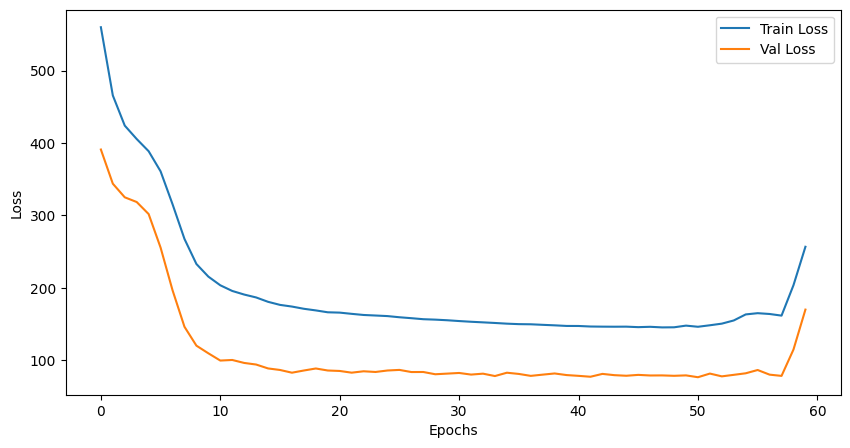

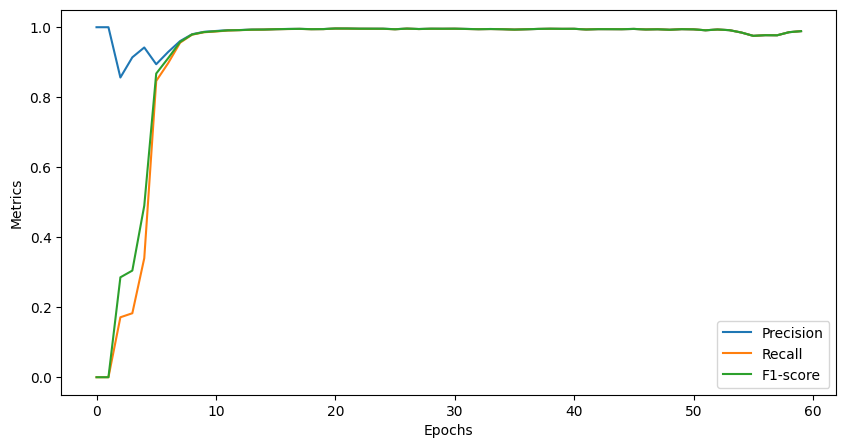

In [7]:
# plot loass and precision recall togheter
plot_loss(train_loss_history, val_loss_history)
plot_precision_recall_f1(precision_recall_history)

In [4]:
model = RPN(dropout_rate=0.4, device=device).to(device)
epoch, train_loss_history, val_loss_history, precision_recall_history = load_checkpoint('models/checkpoints_v5/model_epoch_40.pth', model)

/mnt/d/Documents/GitHub/captcha_solver/character_detection/train.py:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)


Checkpoint loaded from models/checkpoints_v5/model_epoch_40.pth, Epoch: 40


Raw proposals shape: torch.Size([1, 980, 4])
Objectness logits shape: torch.Size([1, 980, 2])
Max objectness score: 38.42792510986328
Min objectness score: -33.47733688354492
After softmax, max score: 0.9999992847442627
Number of proposals after confidence thresholding: 343
Filtered boxes shape: torch.Size([343, 4])
Filtered scores shape: torch.Size([343])
Number of boxes after NMS: 6


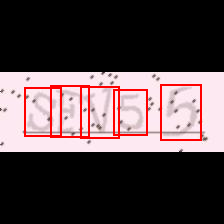

In [7]:
image_path = '../datasets/dataset_v5/98.jpg'
boxes, scores = inference(model, image_path, device, transform, ResizeWithPad(224), conf_threshold=0.95, nms_threshold=0.30)
target = boxes.tolist()
show_image(image_path, target)